In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./bulk.fpkm.fpkm.rda')

In [3]:
ls()

[1] "fpkm"

In [5]:
load('testset1.groups.rda')

In [6]:
ano

sample,group
<chr>,<chr>
SL32231,subtype1
SL32245,subtype1
SL32247,subtype1
SL32248,subtype1
SL5997,subtype1
SL5998,subtype2
SL6341,subtype2
SL6612,subtype2
SL6645,subtype1


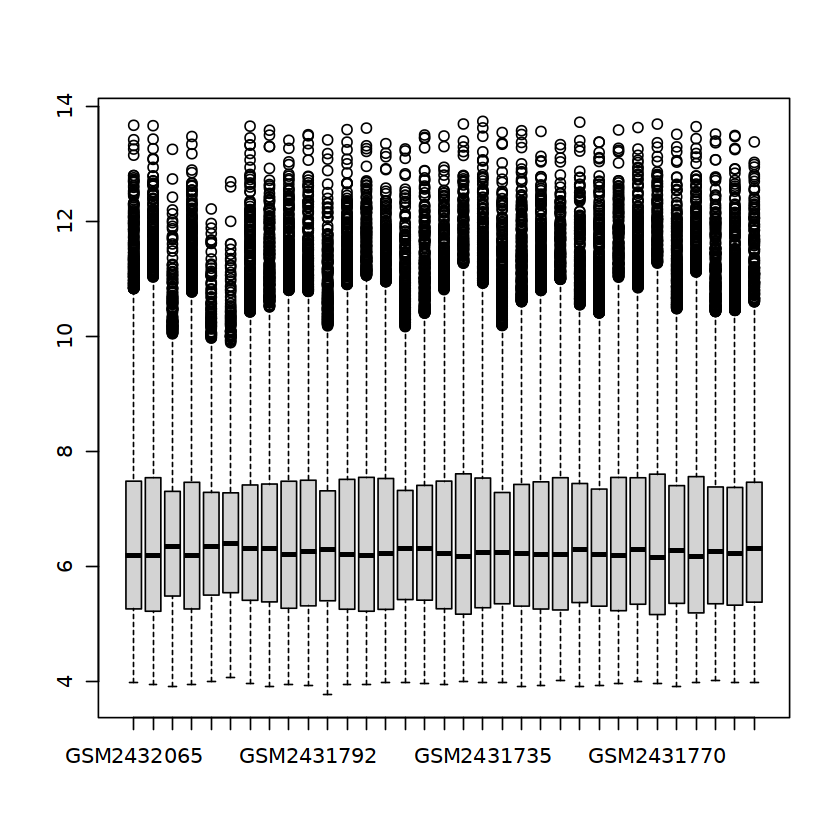

In [47]:
boxplot(expr1)

In [48]:
death2 = ifelse(death == 1,'yes','no')

In [49]:
library(limma)
library(dplyr)
f <- death2 %>% as.factor()

In [50]:

desigN <- model.matrix(~ 0 + f)
colnames(desigN) <- levels(f)
fit = lmFit(expr1, desigN)
contrast.matrix <- makeContrasts(yes - no, levels = colnames(coef(fit)))
contrast.matrix 

,yes - no
no,-1
yes,1


In [51]:
fit2 <- contrasts.fit(fit, contrast.matrix) 
fit2 <- eBayes(fit2) 
tempOutput <- topTable(fit2,coef=1,n=Inf,adjust="BH")
head(tempOutput)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGAT4B,-0.2687584,5.763863,-4.182729,0.0001935070,0.7692677,-1.070183
AP1S2,0.3045384,8.093619,4.042447,0.0002897906,0.7692677,-1.267955
ERO1L,0.2124967,6.140028,3.908937,0.0004242033,0.7692677,-1.456040
TREX1,-0.3019748,7.602845,-3.878516,0.0004624540,0.7692677,-1.498844
ELAVL2,0.4737098,6.046234,3.584274,0.0010546450,0.7692677,-1.910890
BAHCC1,-0.2300429,5.939970,-3.408578,0.0017075311,0.7692677,-2.154215


In [52]:
gene1 = tempOutput %>% filter(P.Value < 0.05) %>%  rownames()

In [57]:
tempOutput['OTUD4',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OTUD4,0.08851993,5.070909,2.08235,0.04496955,0.7692677,-3.823749


In [63]:
diff <- 
  tempOutput %>% 
  mutate(change = as.factor(ifelse(P.Value < 0.05 & abs(logFC) > 0,
                                   ifelse(logFC > 0 ,'Up','Down'),'NOT'))) 
diff$gene = rownames(diff)

In [64]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

In [68]:
diff[c('MUS81','UCK2','CNIH3','OTUD4'),]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MUS81,-0.11979995,7.324224,-2.232620,0.03232322,0.7692677,-3.656928,Down,MUS81
UCK2,-0.16373446,6.066775,-2.145584,0.03919404,0.7692677,-3.754478,Down,UCK2
CNIH3,0.27711847,5.535018,2.117319,0.04168903,0.7692677,-3.785611,Up,CNIH3
OTUD4,0.08851993,5.070909,2.082350,0.04496955,0.7692677,-3.823749,Up,OTUD4


In [70]:
top_5 <- bind_rows(   
      diff %>%
        filter(gene  %in% c('CNIH3','OTUD4')) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(2),
      diff %>%
        filter(gene  %in% c('MUS81','UCK2')) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(2)
    )

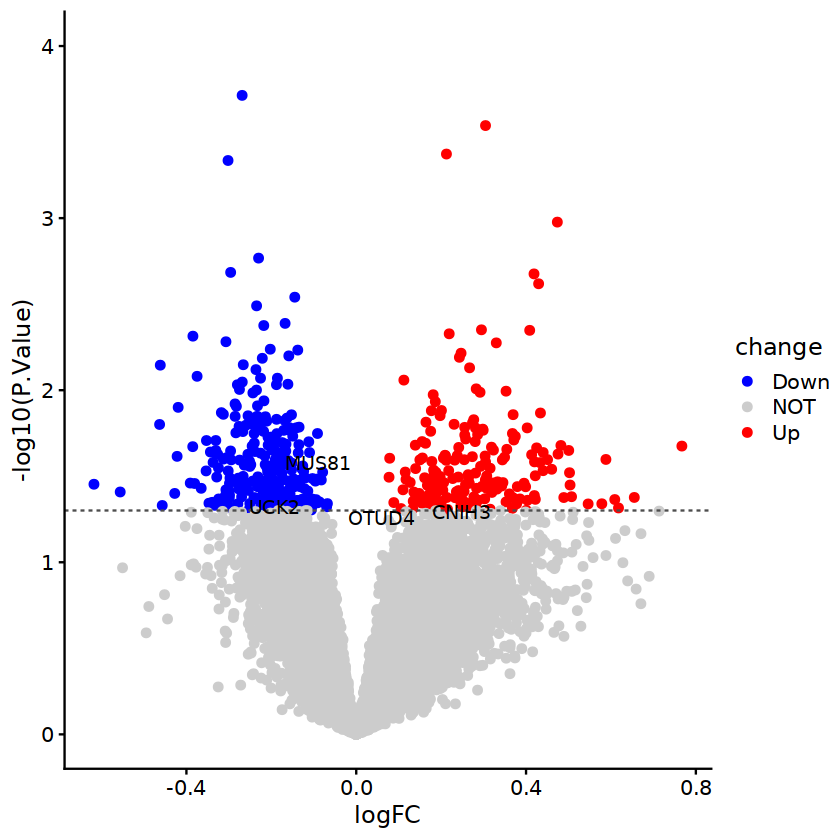

In [73]:

    ggplot(data=diff,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=change),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-0.3,0.3),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() +ylim(0,4)#+xlim(-1.5,1.5)
    #ggsave('Volcano.pdf',height = 8,width = 8)

In [27]:
save(gene1,file = 'zhisha.gene.rda')

In [ ]:
tempOutput1 = tempOutput %>%  dplyr::filter(P.Value < 0.05)

write.csv(tempOutput1,file = 'diffgene1.csv')

In [37]:
matrix = cbind(death2,expr)

In [38]:
write.csv(matrix,file = 'Suicide.matrix.csv')